In [28]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Setup for headless Chrome
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Initialize the driver
driver = webdriver.Chrome(options=options)

# Navigate to the webpage
url = "https://www.bbc.com/weather/293397"
driver.get(url)

In [29]:
wait = WebDriverWait(driver, 10) ## wait for 10 seconds max 
wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'wr-day-temperature')))## wait until we get the class wr-day-temperature fully
wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'wr-day__title')))## same for wr-day__title

<selenium.webdriver.remote.webelement.WebElement (session="e1f50b23407b5fdad8fed69bf669d0c4", element="550ACAAC75BBEED3DFA286920A22C64B_element_35")>

In [30]:
# Scrape the temperature and date elements
temperature_elements = driver.find_elements(By.CLASS_NAME, 'wr-day-temperature')
date_elements = driver.find_elements(By.CLASS_NAME, 'wr-day__title')

In [31]:
data = []
for date_element, temperature_element in zip(date_elements, temperature_elements):
    date_text = date_element.find_element(By.CLASS_NAME, 'wr-date').text
    temperature_text = temperature_element.find_element(By.CLASS_NAME, 'wr-value--temperature--c').text
    data.append({'date': date_text, 'temperature': temperature_text})

In [32]:
driver.quit()

In [33]:
for entry in data:
    print(entry)

{'date': 'Today', 'temperature': '21°'}
{'date': 'Wed 10th', 'temperature': '19°'}
{'date': 'Thu 11th', 'temperature': '18°'}
{'date': 'Fri 12th', 'temperature': '18°'}
{'date': 'Sat 13th', 'temperature': '19°'}
{'date': 'Sun 14th', 'temperature': '18°'}
{'date': 'Mon 15th', 'temperature': '16°'}
{'date': 'Tue 16th', 'temperature': '18°'}
{'date': 'Wed 17th', 'temperature': '19°'}
{'date': 'Thu 18th', 'temperature': '20°'}
{'date': 'Fri 19th', 'temperature': '20°'}
{'date': 'Sat 20th', 'temperature': '21°'}
{'date': 'Sun 21st', 'temperature': '20°'}
{'date': 'Mon 22nd', 'temperature': '20°'}


In [38]:
weather_data = [
    {'date': 'Today', 'temperature': 21},
    {'date': 'Wed 10th', 'temperature': 19},
    {'date': 'Thu 11th', 'temperature': 18},
    {'date': 'Fri 12th', 'temperature': 18},
    {'date': 'Sat 13th', 'temperature': 19},
    {'date': 'Sun 14th', 'temperature': 18},
    {'date': 'Mon 15th', 'temperature': 16},
    {'date': 'Tue 16th', 'temperature': 18},
    {'date': 'Wed 17th', 'temperature': 19},
    {'date': 'Thu 18th', 'temperature': 20},
    {'date': 'Fri 19th', 'temperature': 20},
    {'date': 'Sat 20th', 'temperature': 21},
    {'date': 'Sun 21st', 'temperature': 20},
    {'date': 'Mon 22nd', 'temperature': 20}
]

# 1. Calculate Average Temperature
total_temperature = sum(day['temperature'] for day in weather_data)
average_temperature = total_temperature / len(weather_data)

# 2. Determine Temperature Trend
temperature_trend = "increasing" if weather_data[-1]['temperature'] > weather_data[0]['temperature'] else "decreasing"

# 3. Find Maximum and Minimum Temperature
max_temperature = max(day['temperature'] for day in weather_data)
min_temperature = min(day['temperature'] for day in weather_data)

print(f"Average Temperature: {average_temperature:.2f}°C")
print(f"Temperature Trend: {temperature_trend}")
print(f"Maximum Temperature: {max_temperature}°C")
print(f"Minimum Temperature: {min_temperature}°C")


Average Temperature: 19.07°C
Temperature Trend: decreasing
Maximum Temperature: 21°C
Minimum Temperature: 16°C


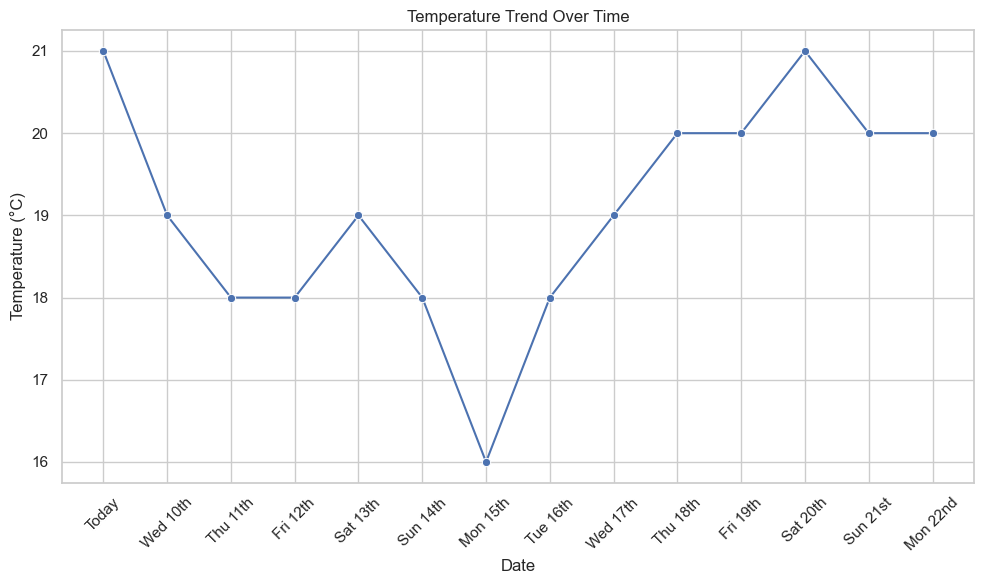

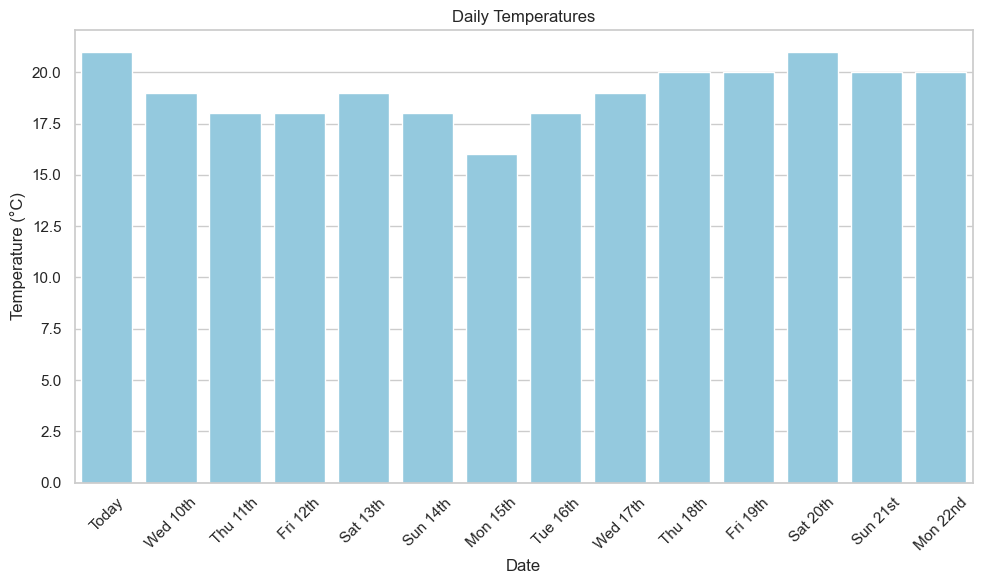

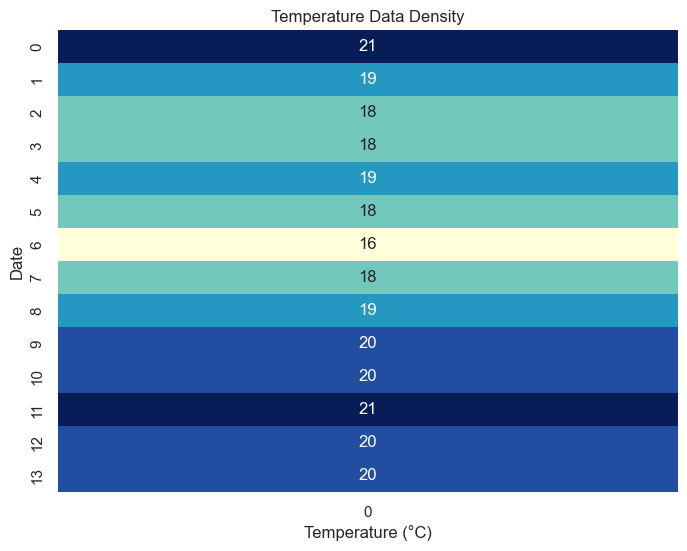

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the temperature data to a list for plotting
dates = [day['date'] for day in weather_data]
temperatures = [day['temperature'] for day in weather_data]

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting the temperature trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=dates, y=temperatures, marker='o', color='b')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting a bar chart for daily temperatures
plt.figure(figsize=(10, 6))
sns.barplot(x=dates, y=temperatures, color='skyblue')
plt.title('Daily Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap for data density
plt.figure(figsize=(8, 6))
heatmap_data = [[day['temperature']] for day in weather_data]
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar=False)
plt.title('Temperature Data Density')
plt.xlabel('Temperature (°C)')
plt.ylabel('Date')
plt.show()